# Running the original DCA implementation

Running experiments with the original DCA had to be on its own notebook because the 

In [ ]:
# downgrade may be needed because DCA uses outdated API + versions not specified as requirements to dca package
!pip install --force-reinstall dca tensorflow==1.15 keras==2.3.1 scanpy==1.4.4 scipy==1.3.0

In [ ]:
exit() # forces session to restart. Alternatively, you can also restart the session manually.

In [ ]:
%load_ext autoreload

# Colab setups

In [ ]:
# Note: GPU may not be needed for the given dataset/chosen model
import tensorflow as tf

if tf.test.gpu_device_name() != '/device:GPU:0':
  print('WARNING: GPU device not found.')
else:
  print('SUCCESS: Found GPU: {}'.format(tf.test.gpu_device_name()))

SUCCESS: Found GPU: /device:GPU:0


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import os

path = 'drive/My Drive/Denoising scRNA-seq - Framework/' #add path of project folder in your G-drive
os.chdir(path)

In [ ]:
!ls

data		     img		 preprocess.py	report.html
experiments.ipynb    model		 __pycache__	report.ipynb
final_report.ipynb   original_dca.ipynb  Readme.md	utils
generate_data.ipynb  original-paper.pdf  readme.txt


# Upload data

In [ ]:
%autoreload 2
from utils import data_utils
from utils import plot_utils

raw, true = data_utils.get_simdata()

In [ ]:
raw_norm = plot_utils.normalize_for_plot(raw)
true_norm = plot_utils.normalize_for_plot(true)

/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_simple.py:284: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:
/usr/local/lib/python3.6/dist-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_simple.py:284: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:


... storing 'Batch' as categorical


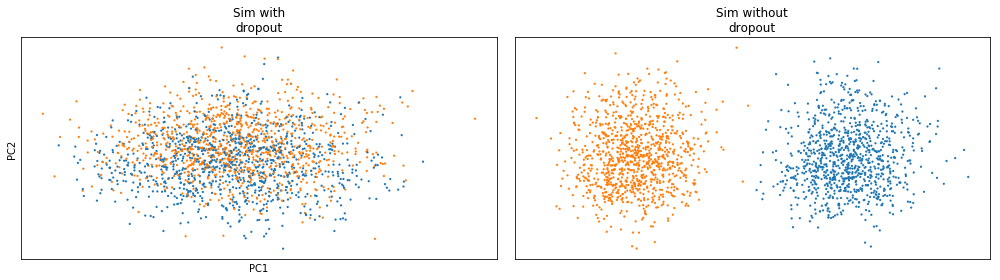

In [ ]:
# visualize data
adatas = [raw_norm, true_norm]
adata_labels = ["Sim with\ndropout", "Sim without\ndropout"]

plot_utils.plot(adatas, adata_labels)

# Denoise data

In [ ]:
from dca.api import dca

dca_denoised = dca(raw, threads=1, copy=True, log1p=False, return_info=True, verbose=False)

# Results

In [ ]:
import pickle

dca_sim = 'dca_raw_2' # replace with dca_+name of your own dataset
with open('data/dca_raw_2.pickle', 'wb') as handle:
    pickle.dump(dca_denoised, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
dca_norm = plot_utils.normalize_for_plot(dca_denoised)

/usr/local/lib/python3.6/dist-packages/scanpy/preprocessing/_simple.py:284: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if isinstance(data, AnnData) and data.isview:


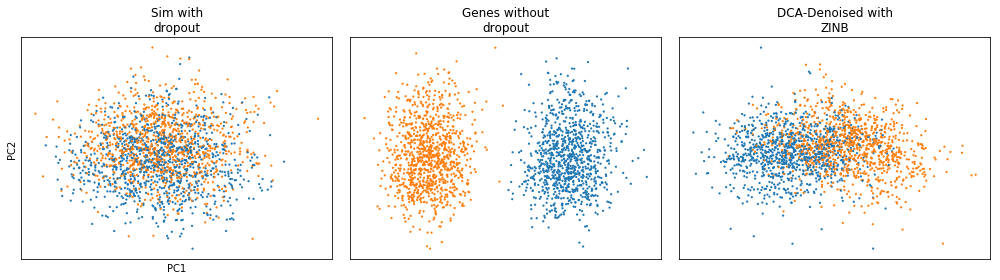

In [ ]:
adatas = [raw_norm, true_norm, dca_norm]
adata_labels = ["Sim with\ndropout", "Sim without\ndropout", "DCA-Denoised with\nZINB"]

plot_utils.plot(adatas, adata_labels)